In [5]:
s='ACGT'

In [6]:
len(s)

4

In [7]:
len('')

0

In [8]:
s[0]

'A'

In [9]:
s[2]

'G'

In [10]:
s='AACC'

In [11]:
t='GGTT'

In [12]:
s+t

'AACCGGTT'

In [13]:
s='AACCGGTT'

In [14]:
s[2:6]

'CCGG'

In [15]:
s[0:6]

'AACCGG'

In [16]:
s[:6]

'AACCGG'

In [17]:
s[4:8]

'GGTT'

In [18]:
s[-4:]

'GGTT'

In [19]:
seq = "ACGT"

In [20]:
seq[1]

'C'

In [21]:
len(seq)

4

In [22]:
e=''

In [23]:
len(e)

0

In [24]:
seq1 = 'CCAA'
seq2 = 'GGTT'
print(seq1+seq2)

CCAAGGTT


In [25]:
seqs = ['A', 'C', 'G', 'T']
print(','.join(seqs))

A,C,G,T


In [26]:
import random
random.choice('ACGT')

'C'

In [27]:
import random
random.seed(7)
random.choice('ACGT') #will spit out G every time

'G'

In [28]:
seq = ''
for i in range(10):
    seq += random.choice('ACGT')
print(seq)

CTAAAGACAA


In [29]:
seq = ''.join([random.choice('ACGT') for i in range(10)])
print(seq)

TTACATAACA


In [30]:
seq[1:3]

'TA'

In [31]:
seq[:3]

'TTA'

In [32]:
seq[0:3]

'TTA'

In [33]:
seq[7:len(seq)]

'ACA'

In [34]:
seq[-3]

'A'

In [35]:
seq[-3:]

'ACA'

In [36]:
def longestCommonPrefix(s1,s2): #writing a function to find the longest common prefix between two strings
    i=0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1 #same as i = i + 1
    return s1[:i]
longestCommonPrefix('ACCAACTAGCTGT', 'ACCAACTAGCGAC')

'ACCAACTAGC'

In [37]:
len('ACCATGT')

7

In [38]:
'ACTGT' == 'ACGTG' #whether two strings match exactly 

False

In [39]:
'ACTGT' == 'ACTGT' #whether two strings match exactly

True

In [40]:
#find reverse complement of a DNA sequence
def reverseComplement(s):
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A'}
    t=''
    for base in s:
        t = complement[base] + t #the "+t" reverses the sequence and has to come after 'complement[base]' in order to have
                                 #the reverse effect
    return t
reverseComplement('ACCAGTCG')

'CGACTGGT'

In [41]:
#Parsing through a genome
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('lambda_virus.fa')
genome[:100]
    

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [42]:
len(genome)

48502

In [43]:
#Count the frequency of each base
counts = {'A':0, 'C':0, 'G':0, 'T':0}
for base in genome:
    counts[base] += 1 #Need to use "+=" because need to parse through every single base throughout the genome
print(counts)

{'A': 12334, 'C': 11362, 'G': 12820, 'T': 11986}


In [44]:
#Count the frequency of each base - Alternate Method
import collections
collections.Counter(genome)


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [45]:
#Parsing through a FASTQ file
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [46]:
seqs[:5]

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG',
 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA',
 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']

In [47]:
quals[:5]

['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################',
 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########',
 '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A',
 '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################',
 '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==C;CCD(?@>@#############################']

In [48]:
def phred33ToQ(qual): #convert phred 33 encoded value to just a quality score
    return ord(qual) - 33

In [49]:
phred33ToQ('#')

2

In [50]:
phred33ToQ('J')

41

In [51]:
def createHist(qualityStrings):
    # Create a histogram of quality scores
    hist = [0]*50 #The highest quality score we saw is 41, but going up to 50 just to be safe
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [52]:
# Plot the histogram
import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

<Figure size 640x480 with 1 Axes>

[0.486, 0.535, 0.574, 0.569, 0.58, 0.562, 0.557, 0.563, 0.562, 0.577, 0.582, 0.547, 0.531, 0.572, 0.548, 0.546, 0.566, 0.587, 0.546, 0.548, 0.578, 0.588, 0.601, 0.594, 0.534, 0.553, 0.553, 0.577, 0.626, 0.565, 0.539, 0.579, 0.558, 0.593, 0.59, 0.578, 0.579, 0.567, 0.561, 0.599, 0.591, 0.575, 0.546, 0.549, 0.574, 0.547, 0.566, 0.593, 0.553, 0.578, 0.566, 0.579, 0.596, 0.578, 0.606, 0.576, 0.551, 0.59, 0.554, 0.568, 0.575, 0.565, 0.597, 0.539, 0.584, 0.577, 0.549, 0.581, 0.598, 0.578, 0.564, 0.553, 0.571, 0.551, 0.575, 0.548, 0.591, 0.579, 0.571, 0.572, 0.558, 0.602, 0.578, 0.582, 0.548, 0.583, 0.542, 0.57, 0.601, 0.593, 0.551, 0.594, 0.543, 0.607, 0.572, 0.598, 0.598, 0.536, 0.593, 0.561]


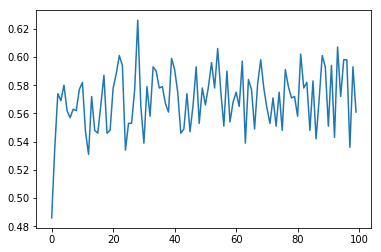

In [53]:
def findGCByPos(reads):
    ''' Find the GC ratio at each position in the read '''
    # Keep track of the number of G/C bases and the total number of bases at each position
    gc = [0] * 100 #Multiplying by 100 because all reads are of length 100
    totals = [0] * 100
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1 #increment GC array at index i
            totals[i] += 1 #increment totals array at index i. Notice that there is no indent for this statement
    # Divide G/C counts by total counts to get the average at each position
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i] /= float(totals[i])
    return gc

gc = findGCByPos(seqs)
print(gc)
plt.plot(range(len(gc)), gc)
plt.show()

In [54]:
import collections
count = collections.Counter()
for seq in seqs:
    count.update(seq)
count

Counter({'T': 21836, 'A': 21132, 'C': 28272, 'G': 28742, 'N': 18})

In [55]:
#NaiveExactMatching-MatchingArtificialReads
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [56]:
genome = readGenome('phix.fa')


In [57]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
    return occurrences

In [58]:
t = 'AGCTTAGATAGC'
p = 'AG'
naive(p, t)

[0, 5, 9]

In [59]:
import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome. '''
    reads = []
    for _ in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        reads.append(genome[start : start+readLen])
    return reads

In [60]:
# Generate 100 reads of length 100
reads = generateReads(genome, 100, 100)

# Count how many reads match the genome exactly
numMatched = 0
for r in reads:
    matches = naive(r, genome)
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, len(reads)))

100 / 100 reads matched the genome exactly!


In [61]:
def readFastq(filename):
    sequences = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            fh.readline() # skip base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
    return sequences

In [62]:
import collections
phix_reads = readFastq('ERR266411_1.first1000.fastq')
count = collections.Counter()
for read in phix_reads:
    count.update(read)
count

Counter({'T': 30531, 'A': 28426, 'C': 21890, 'G': 19147, 'N': 6})

In [63]:
numMatched = 0
n = 0
for r in phix_reads:
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

7 / 1000 reads matched the genome exactly!


In [64]:
# Now let's try matching just the first 30 bases of each read
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

459 / 1000 reads matched the genome exactly!


In [65]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

In [66]:
numMatched = 0
n = 0
for r in phix_reads:
    r = r[:30]  # just taking the first 30 bases
    matches = naive(r, genome)
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:
        numMatched += 1
print('%d / %d reads matched the genome exactly!' % (numMatched, n))

932 / 1000 reads matched the genome exactly!
